Problem for Covid - 19 Data Analysis Project using Python

In [1]:
# import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. import dataset using pandas from above mentioned url
'https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv'

In [2]:
corona_dataset_csv = pd.read_csv('https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv')

In [4]:
corona_dataset_csv.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,05/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,06/01/20,NaN,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,07/01/20,NaN,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,08/01/20,NaN,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,09/01/20,NaN,0.0,0.0,NaN,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


2. high level data understanding

In [6]:
# a. find no of rows & columns in dataset
num_rows, num_cols = corona_dataset_csv.shape
print('Number of rows: ',num_rows)
print('Number of columns: ',num_cols)

Number of rows:  57394
Number of columns:  49


In [11]:
# b. data types of columns
columns_data_types = corona_dataset_csv.dtypes
print(columns_data_types)

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [13]:
# c. info & describe of data in dataframe
corona_dataset_csv.info()
corona_dataset_csv.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,...,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,...,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,...,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,...,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,...,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,...,31400.840000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.380000,0.847000
max,5.515465e+07,646281.000000,584981.857000,1.328537e+06,10600.000000,9027.714000,76541.772000,8652.658000,2472.188000,1248.014000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


3. low level data understanding

In [15]:
# a. find count of unique values in location column
unique_location_count = corona_dataset_csv['location'].nunique()
print('Count of unique values in the location column:', unique_location_count)

Count of unique values in the location column: 216


In [17]:
# b. find which continent has maximum frequency using values counts
continent_frequency = corona_dataset_csv['continent'].value_counts()
continent_with_max_frequency = continent_frequency.idxmax()
print('Continent with maximum frequency:', continent_with_max_frequency)

Continent with maximum frequency: Europe


In [19]:
# c. find maximum & mean value in 'total_cases'.
max_total_cases = corona_dataset_csv['total_cases'].max()
mean_total_cases = corona_dataset_csv['total_cases'].mean()

print("Maximum value in 'total_cases':", max_total_cases)
print("Mean value in 'total_cases':", mean_total_cases)

Maximum value in 'total_cases': 55154651.0
Mean value in 'total_cases': 167797.3688753302


In [21]:
# d. find 25%,50% & 75% quartile value in 'total_deaths'.
quartile_25 = corona_dataset_csv['total_deaths'].quantile(0.25)
quartile_50 = corona_dataset_csv['total_deaths'].quantile(0.50)
quartile_75 = corona_dataset_csv['total_deaths'].quantile(0.75)

print("25% quartile value in 'total_deaths':", quartile_25)
print("50% quartile value in 'total_deaths':", quartile_50)
print("75% quartile value in 'total_deaths':", quartile_75)

25% quartile value in 'total_deaths': 13.0
50% quartile value in 'total_deaths': 84.0
75% quartile value in 'total_deaths': 727.0


In [23]:
# e. find which continent has maximum 'human_development_index'.
continent_with_max_hdi = corona_dataset_csv.loc[corona_dataset_csv['human_development_index'].idxmax(), 'continent']
print("Continent with maximum 'human_development_index':", continent_with_max_hdi)

Continent with maximum 'human_development_index': Europe


In [25]:
# f. find which continent has minimum 'gdp_per_capita'.
continent_with_min_gdp = corona_dataset_csv.loc[corona_dataset_csv['gdp_per_capita'].idxmin(), 'continent']
print("Continent with minimum 'gdp_per_capita':", continent_with_min_gdp)

Continent with minimum 'gdp_per_capita': Africa


4. filter dataframe with only this columns
['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'] and update dataframe

In [27]:
# instead of updating original dataframe - created a copy dataframe
corona_dataset_csv_copy = corona_dataset_csv.loc[:, ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']]

5. data cleaning

In [29]:
# a. remove all duplicates obserevations
corona_dataset_csv_copy.drop_duplicates()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [31]:
# b. find missing values in all columns
missing_values = corona_dataset_csv_copy.isnull().sum()
print(missing_values)

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


In [33]:
# c. remove all observations where continent column value is missing
# tip: using subset parameter in dropna
corona_dataset_csv_copy.dropna(subset = ['continent'])

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [35]:
# d. fill all missing values with 0
corona_dataset_csv_copy.fillna(0)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
57389,0,International,13/11/20,696.0,7.0,0.000,0.000
57390,0,International,14/11/20,696.0,7.0,0.000,0.000
57391,0,International,15/11/20,696.0,7.0,0.000,0.000
57392,0,International,16/11/20,696.0,7.0,0.000,0.000


6. date time format

In [37]:
# a. convert date column in datetime format using pandas.to_datetime
corona_dataset_csv_copy['date'] = pd.to_datetime(corona_dataset_csv_copy['date'], format='%d/%m/%y') 
corona_dataset_csv_copy['date']

0       2019-12-31
1       2020-01-01
2       2020-01-02
3       2020-01-03
4       2020-01-04
           ...    
57389   2020-11-13
57390   2020-11-14
57391   2020-11-15
57392   2020-11-16
57393   2020-11-17
Name: date, Length: 57394, dtype: datetime64[ns]

In [39]:
# b. create new column month after extracting month data from date column
corona_dataset_csv_copy['month'] = corona_dataset_csv_copy['date'].dt.month
corona_dataset_csv_copy['month']

0        12
1         1
2         1
3         1
4         1
         ..
57389    11
57390    11
57391    11
57392    11
57393    11
Name: month, Length: 57394, dtype: int32

7. data aggregation

# a. find max value in all columns using groupby function on 'continent' column
tip: use reset_index() after applying groupby
# b. store result in new dataframe named 'df_groupby'
(Use df_groupby dataframe for all further analysis)

In [41]:
# a. find max value in all columns using groupby function on 'continent' column
# tip: use reset_index() after applying groupby

# Group the DataFrame by 'continent' and find the maximum value in each column
max_values = corona_dataset_csv_copy.groupby('continent').max()

# Reset the index to make 'continent' a regular column
max_values = max_values.reset_index()

print(max_values)

       continent                      location       date  total_cases  \
0         Africa                      Zimbabwe 2020-11-17     752269.0   
1           Asia                         Yemen 2020-11-17    8874290.0   
2         Europe                       Vatican 2020-11-17    1991233.0   
3  North America  United States Virgin Islands 2020-11-17   11205486.0   
4        Oceania             Wallis and Futuna 2020-11-17      27750.0   
5  South America                     Venezuela 2020-11-17    5876464.0   

   total_deaths  gdp_per_capita  human_development_index  month  
0       20314.0       26382.287                    0.797     12  
1      130519.0      116935.600                    0.933     12  
2       52147.0       94277.965                    0.953     12  
3      247220.0       54225.446                    0.926     12  
4         907.0       44648.710                    0.939     12  
5      166014.0       22767.037                    0.843     12  


In [54]:
# b. store result in new dataframe named 'df_groupby'
#(Use df_groupby dataframe for all further analysis)
df_groupby = max_values
df_groupby.reset_index()
print(df_groupby)

       continent                      location       date  total_cases  \
0         Africa                      Zimbabwe 2020-11-17     752269.0   
1           Asia                         Yemen 2020-11-17    8874290.0   
2         Europe                       Vatican 2020-11-17    1991233.0   
3  North America  United States Virgin Islands 2020-11-17   11205486.0   
4        Oceania             Wallis and Futuna 2020-11-17      27750.0   
5  South America                     Venezuela 2020-11-17    5876464.0   

   total_deaths  gdp_per_capita  human_development_index  month  
0       20314.0       26382.287                    0.797     12  
1      130519.0      116935.600                    0.933     12  
2       52147.0       94277.965                    0.953     12  
3      247220.0       54225.446                    0.926     12  
4         907.0       44648.710                    0.939     12  
5      166014.0       22767.037                    0.843     12  


8. feature enginnering

In [56]:
# a. create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']
df_groupby['total_deaths_to_total_cases']

0    0.027004
1    0.014708
2    0.026188
3    0.022062
4    0.032685
5    0.028251
Name: total_deaths_to_total_cases, dtype: float64

9. data visualization

/tmp/ipykernel_1100/4017458989.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdp_per_capita)


<Axes: xlabel='gdp_per_capita', ylabel='Density'>

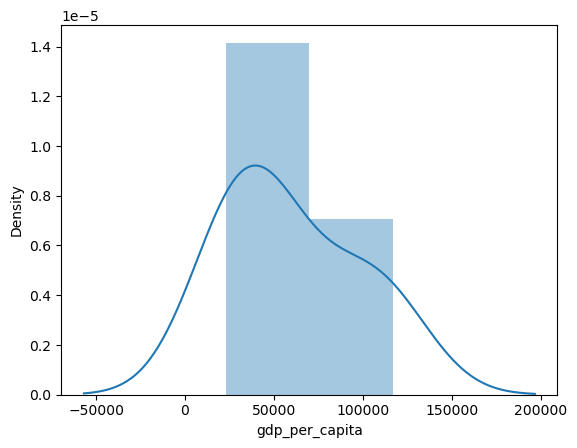

In [58]:
# a. perform univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot
# Step 1: Filter the 'gdp_per_capita' column
gdp_per_capita = df_groupby['gdp_per_capita']
# Step 2: Plot the histogram using seaborn distplot
sns.distplot(gdp_per_capita)

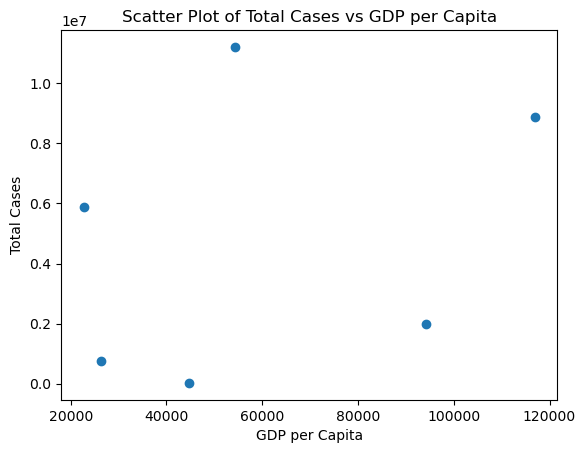

In [60]:
# b. plot a scatter plot of 'total_cases' & 'gdp_per_capita'

# Assuming you have two lists of data: total_cases and gdp_per_capita
total_cases = df_groupby['total_cases']
gdp_per_capita = df_groupby['gdp_per_capita']

# Plotting the scatter plot
plt.scatter(gdp_per_capita, total_cases)

# Adding labels and title
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')
plt.title('Scatter Plot of Total Cases vs GDP per Capita')

# Displaying the plot
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


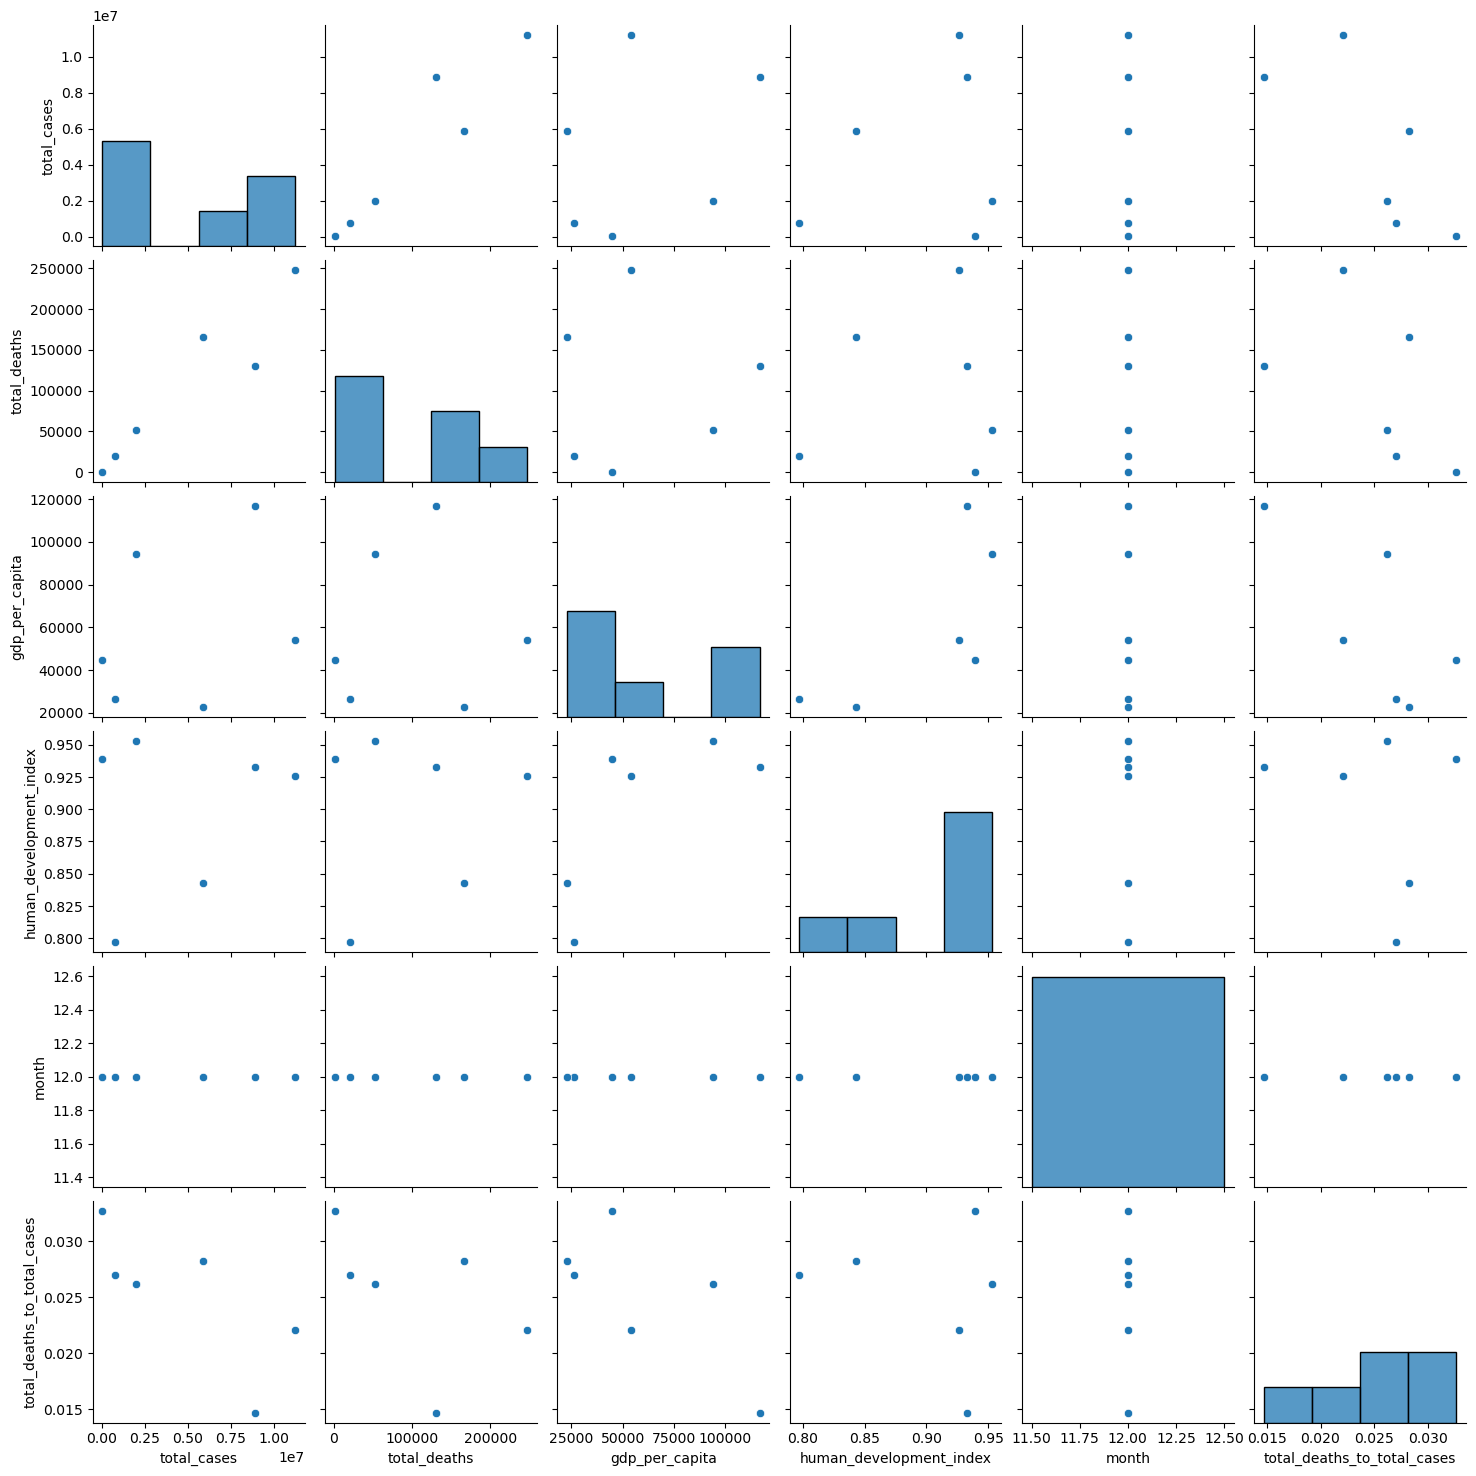

In [62]:
# c. plot pairplot on df_groupby dataset

# Create a pairplot using seaborn
sns.pairplot(df_groupby)

# Display the plot
plt.show()

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


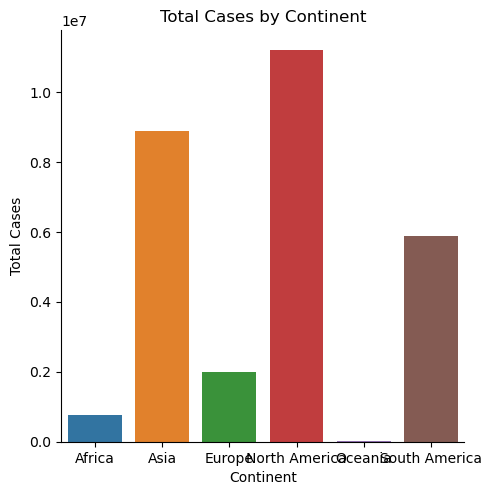

In [64]:
# d. plot barplot of 'continent' column with 'total_cases'
# tip: using kind='bar' in searborn catplot

sns.catplot(data=df_groupby, x='continent', y='total_cases', kind='bar')

plt.title('Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.show()

# Display the plot
plt.show()

In [70]:
# 10. save df_groupby dataframe in your local drive using pandas.to_csv function
df_groupby.to_csv(r'C:\Users\HP\Documents\EdYoda\Sessions\Programs\DW&V\Final Project Data Wrangling\df_groupby.csv', index=False)